# Ознакомление и предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

data=pd.read_csv('/datasets/games.csv')
data_1=data #для тестов

# Выявление тенденций рынка и пиковых значений различных категорий

In [2]:
print(data.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [3]:
data.columns #ознакамливаюсь с названием колонок

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [4]:
data.isna().sum(), data.duplicated().sum() #смотрю наличие пропусков и дублей

(Name                  2
 Platform              0
 Year_of_Release     269
 Genre                 2
 NA_sales              0
 EU_sales              0
 JP_sales              0
 Other_sales           0
 Critic_Score       8578
 User_Score         6701
 Rating             6766
 dtype: int64,
 0)

In [5]:
#1. Изменяю названия стобцов к нижниму регистру
data.columns = data.columns.str.lower()

#2. Изменяю типы данных столбцов
data['other_sales']=data['other_sales'].astype('float64')
data['critic_score']=data['critic_score'].astype('float64')
data['user_score']=pd.to_numeric(data['user_score'], errors='coerce')

data.info() #проверяю результат 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [6]:
#3. Обрабатываю пропуски

data=data.dropna(subset=['name']) # удаляю 2 строки без имени игры, на мой взгляд это критичная информация. У этих же игр нет жанра
data=data.dropna(subset=['year_of_release']) # удаляю 269 строк, платформы старые. Удаление этих данных на прогноз 2017 не повлияет
data['rating']=data['rating'].fillna('RP') #Заполняю пропуски категорией "без рейтинга" 
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Аббревиатура tbd - "будет определено", т.е. либо игра только анонсирована либо не успели "заслужить" рейтинг. Приравниваю к NaN на предыдущем шаге.
любой другой, чтоб заполнять эти данные
Пропуски  в столбце "год выхода" скорее всего обусловлены, тем что игры на старых платформах. Можно удалить строки.
Пропуски в стоблбце "рейтинг" может быть обусловлен, тем что разработчики банально не оценили свою игру по данному мировому стандарту.
Пропуски в стобдцах "оценки" могут быть из-за большого возраста игр.

In [7]:
#4. Считаю доп.показатель
data['total_sales'] = data[[
    'na_sales',
    'eu_sales',
    'jp_sales', 
    'other_sales']].sum(axis = 1) #доп.столбец для подведения итогов продаж
data.isna().sum() #контрольная проверка
data.info() #контрольная проверка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


# Выявление пиковых показателей различных регионов продаж

Вывод: Для построения прогноза весь датасет не нужен. Ограничу период 2011-2015 годом. 5 лет


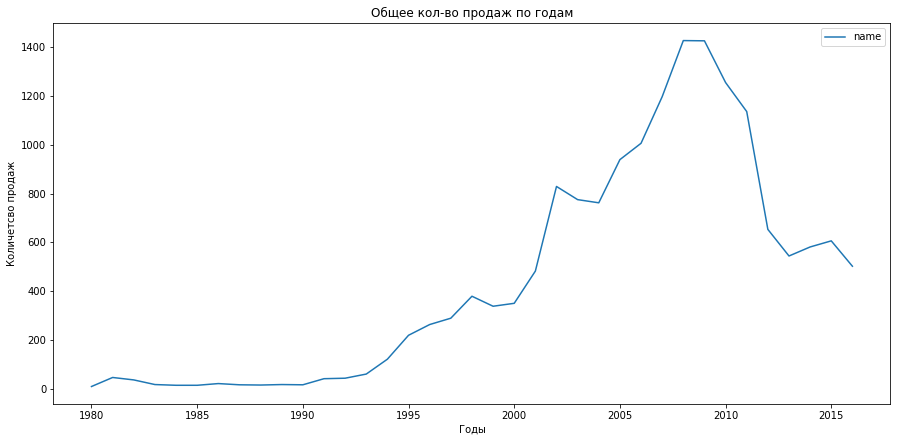

In [8]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count',).plot(figsize = (15,7)) #график
plt.title('Общее кол-во продаж по годам')
plt.xlabel('Годы')
plt.ylabel('Количетсво продаж')

print('Вывод: Для построения прогноза весь датасет не нужен. Ограничу период 2011-2015 годом. 5 лет')

Начиная с 1980 года начинается планомерный рост кол-ва релизов новых игр. Пиковые значения приходятся на 2008-2009 годы.
Для построения прогноза возьму данные за последние 4 года (2012-2015)

In [9]:
data.pivot_table(index='platform',  values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head()
#топ5 платформ с высокими продажами это DS, Wii, PS3, X360, PS2

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


Средний срок продаж на рынке игровой платформы - 10 лет


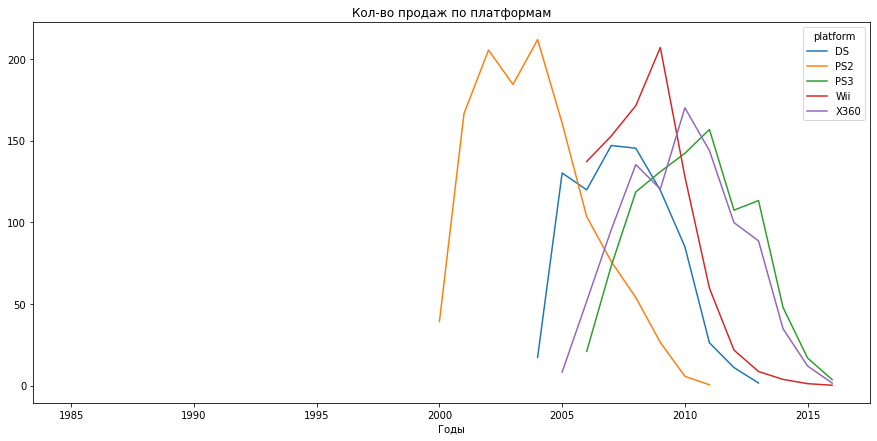

In [10]:
data.query('platform == ["DS", "Wii", "PS3", "X360", "PS2"]').pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize = (15,7)) 
plt.title('Кол-во продаж по платформам')
plt.xlabel('Годы')
print('Средний срок продаж на рынке игровой платформы - 10 лет')

Продажи у данных платформ наибольшие, однако тенденция опродаж отрицательная.
Срок "жизни" продаж DS - 9 лет, PS2 - 10лет
PS3, Wii, X360 - в 2016 году прожажи резко упали, можно предположить что срок жизни этих платформ составит те же 10 лет

In [11]:
#Основной фактор — эти данные помогут построить прогноз на 2017 год.
data_2=data
data=data.query('year_of_release > 2011')
# ограничиваю датасет интересующим меня периодом

In [12]:
data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum') #таблица

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012.0,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013.0,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014.0,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Потенциально прибыльные платформы на 2017 год - PS4 и XOne


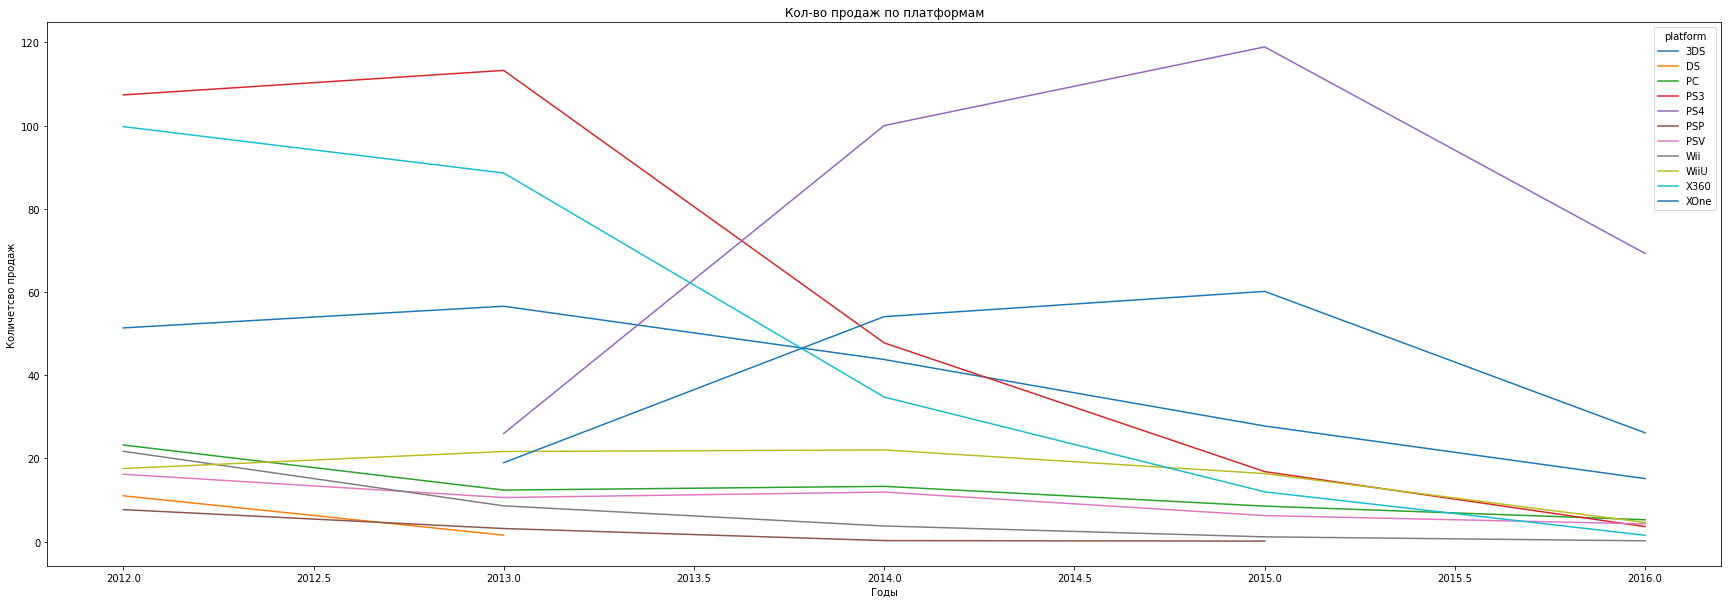

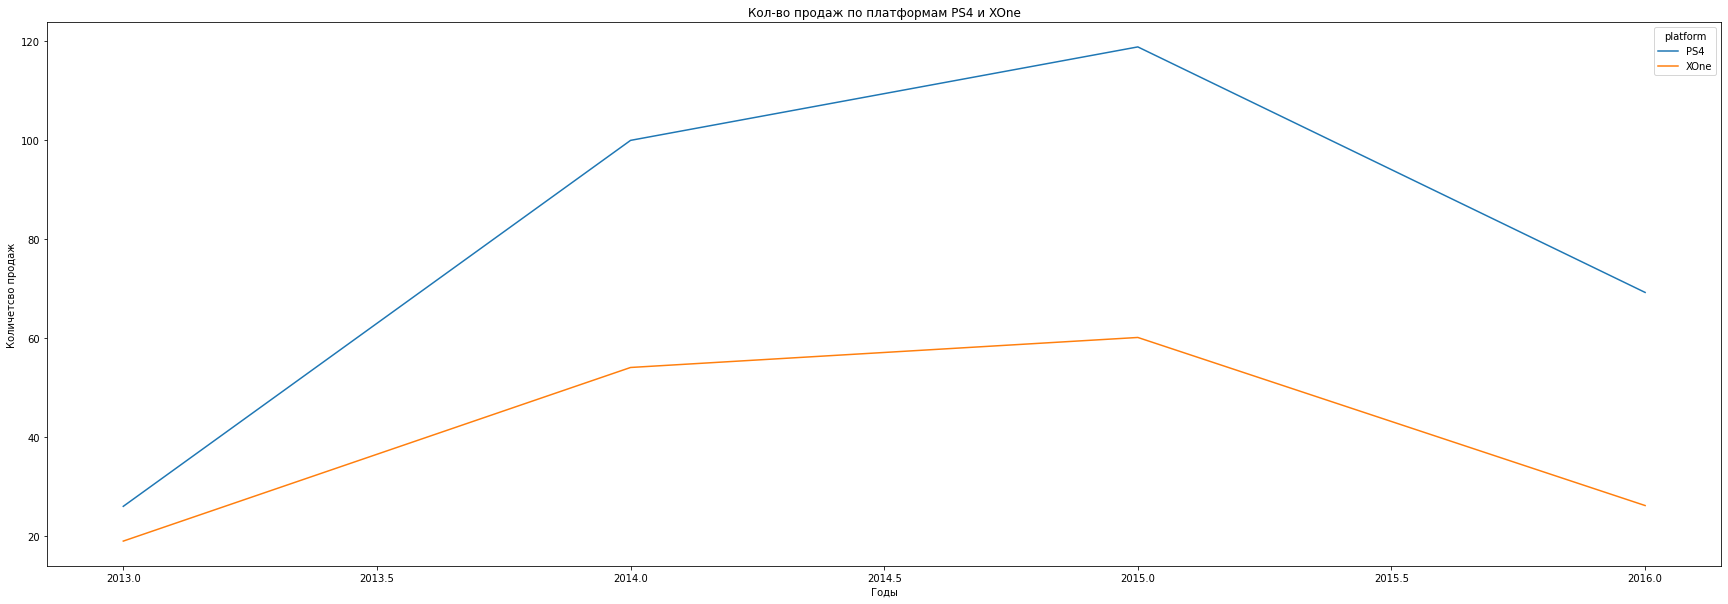

In [13]:
data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize = (30,10)) #график
#на общем графике видно, что тенденция отрицательная у всех платфорт кроме двух PS4 и XOne
plt.title('Кол-во продаж по платформам')
plt.xlabel('Годы')
plt.ylabel('Количетсво продаж')

data.query('platform == ["PS4", "XOne"]').pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize = (30,10))
plt.title('Кол-во продаж по платформам PS4 и XOne')
plt.xlabel('Годы')
plt.ylabel('Количетсво продаж')
#если принять что данные по 2016 году не полные, можно предположить, что тенденция к росту продаж платформ сохраняется
print('Потенциально прибыльные платформы на 2017 год - PS4 и XOne')

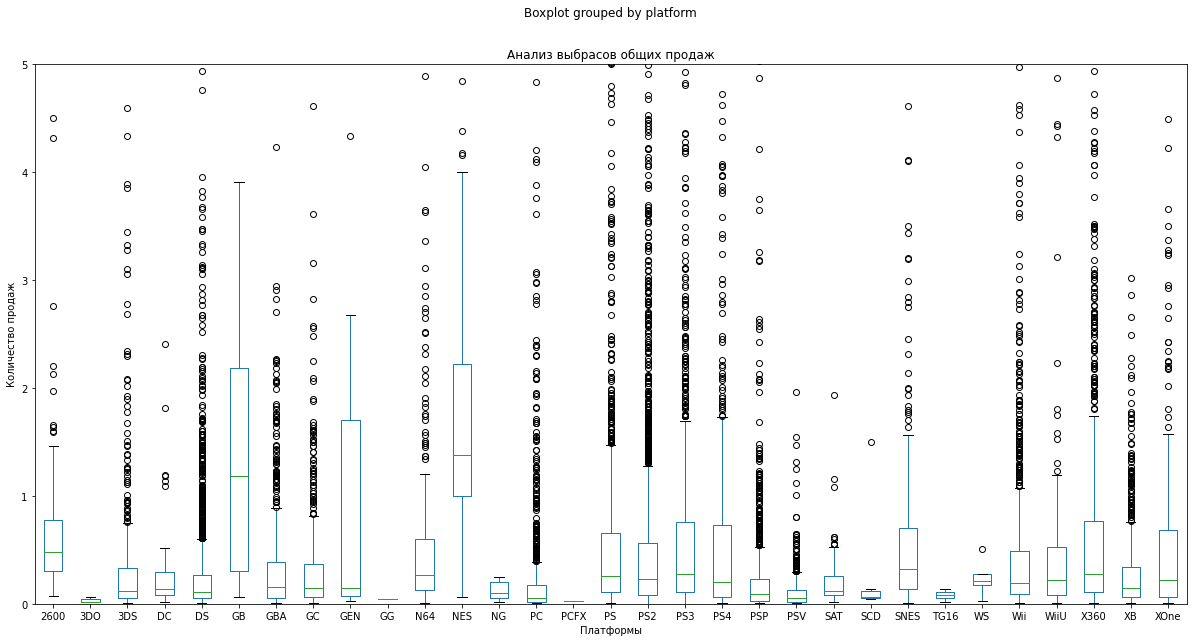

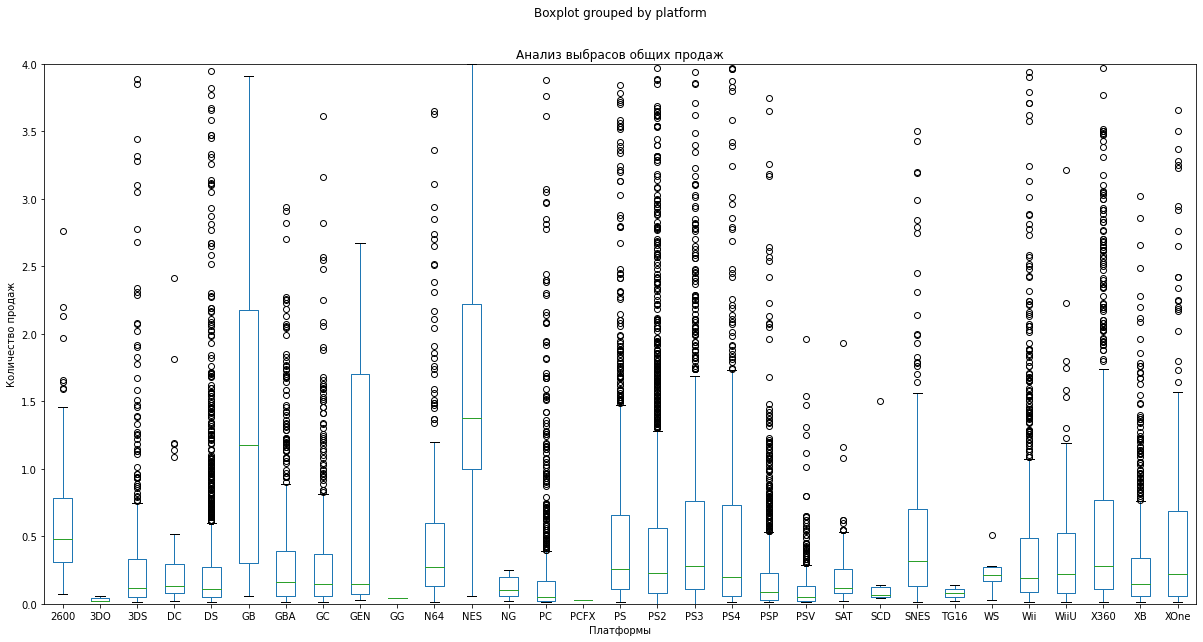

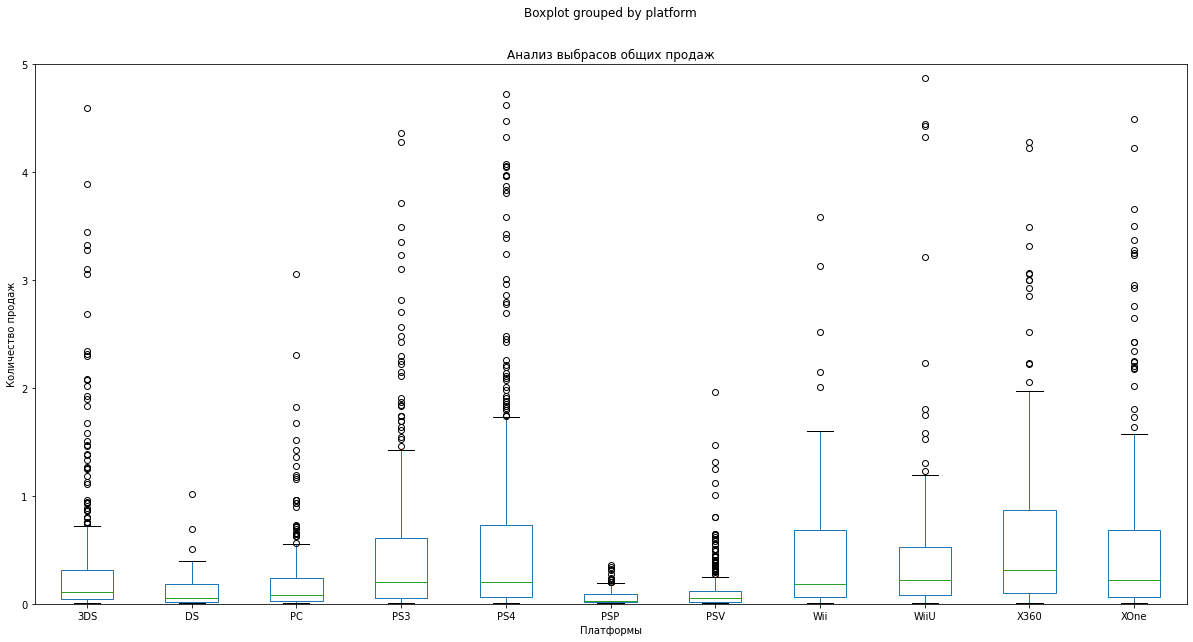

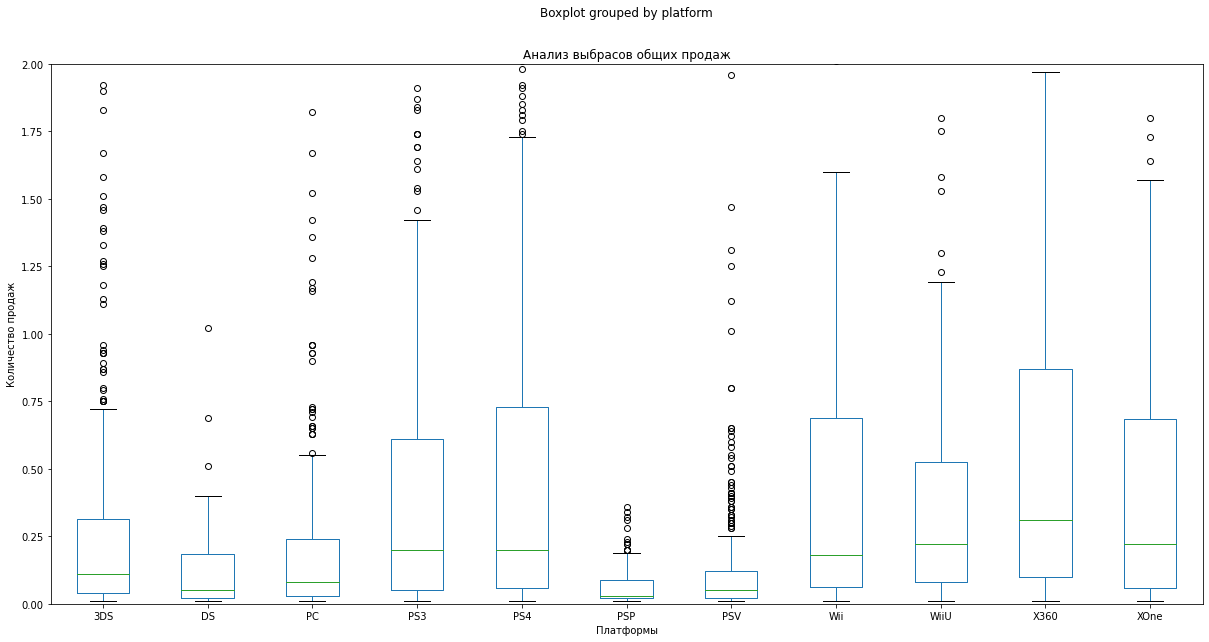

Среди новых платформ лидируют PS3, PS4, X360, 3DS, XOne. У Х360 и WiiU наименьшее число выбросов


In [14]:
#5. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

data_2.boxplot(by='platform', column='total_sales', figsize = (20,10), grid=False)
plt.title('Анализ выбрасов общих продаж')
plt.ylabel('Количество продаж')
plt.xlabel('Платформы')
plt.ylim(0, 5)
plt.show()

data_2.boxplot(by='platform', column='total_sales', figsize = (20,10), grid=False)
plt.title('Анализ выбрасов общих продаж')
plt.ylabel('Количество продаж')
plt.xlabel('Платформы')
plt.ylim(0, 4)
plt.show()

data.boxplot(by='platform', column='total_sales', figsize = (20,10), grid=False)
plt.title('Анализ выбрасов общих продаж')
plt.ylabel('Количество продаж')
plt.xlabel('Платформы')
plt.ylim(0, 5)
plt.show()

data.boxplot(by='platform', column='total_sales', figsize = (20,10), grid=False)
plt.title('Анализ выбрасов общих продаж')
plt.ylabel('Количество продаж')
plt.xlabel('Платформы')
plt.ylim(0, 2)
plt.show()

print('Среди новых платформ лидируют PS3, PS4, X360, 3DS, XOne. У Х360 и WiiU наименьшее число выбросов')

Кореляця между продажами и оценкой критиков определенно есть, хоть и небольшая. Оценки игроков влияют так же немного, хотя у PS4 кореляция выше


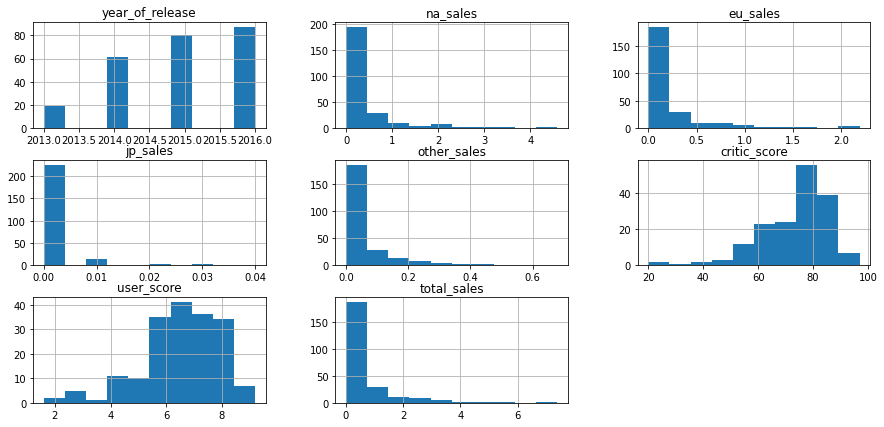

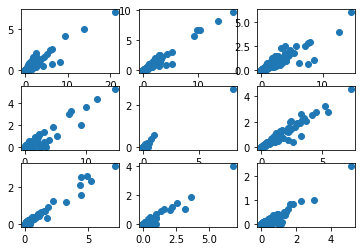

In [15]:
data.query('platform ==  "XOne"').hist(figsize=(15,7))

fig, axes = plt.subplots(3,3)
axes=axes.ravel()
n=0
for platform in data.platform.unique()[0:9]:
    axes[n].scatter(data=data.query('platform == @platform'), x='total_sales', y='na_sales')
    n+=1

data.query('platform ==  "XOne"').corr() 
#кореляця между продажами и оценкой критиков определенно есть, хоть и небольшая. Однако оценки игроков влияют мало
data.query('platform ==  "PS4"').corr() 
#вывод тот же

print('Кореляця между продажами и оценкой критиков определенно есть, хоть и небольшая. Оценки игроков влияют так же немного, хотя у PS4 кореляция выше')

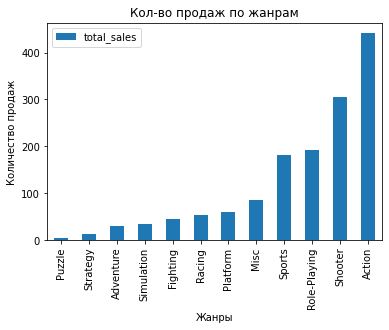

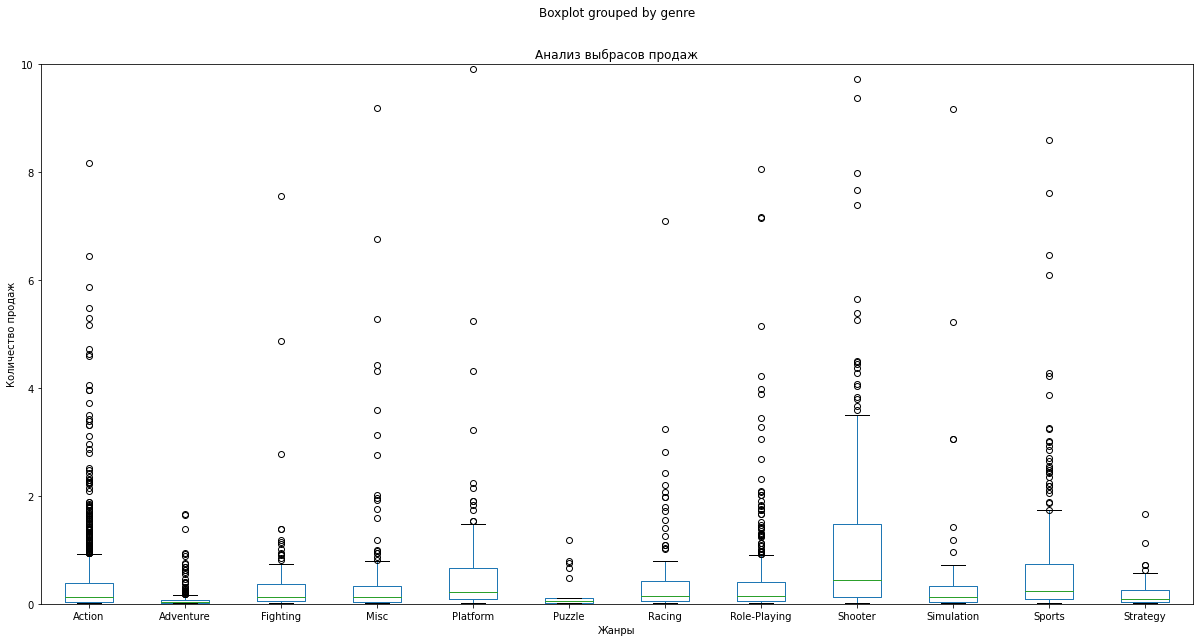

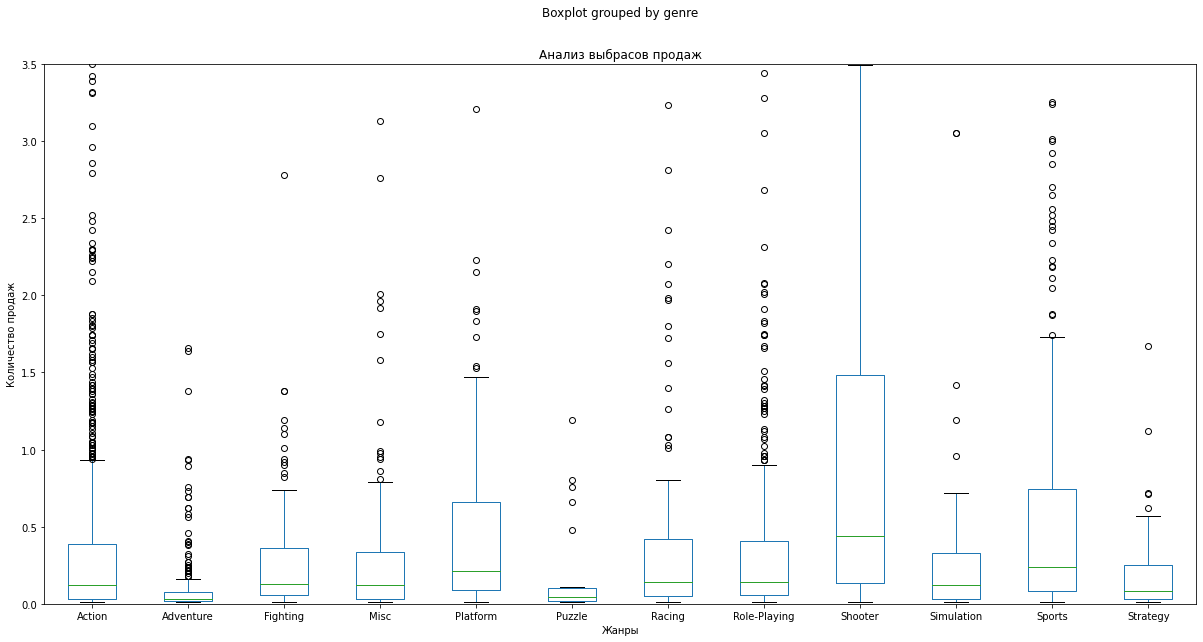

топ 3 самых прибыльных жанра: Role-Playing, Shooter, Action
топ 3 самых НЕприбыльных жанров:  Adventure, Strategy, Puzzle
Жанр Shooter является самым прибыльным из стабильно продающихся. Жанр Action менее стабилен и лидирует в абсолютных цифрах из-за редких, аномальных, высоких продаж


In [16]:
data.pivot_table(index='genre',  values='total_sales', aggfunc='sum').sort_values(by='total_sales').plot(kind='bar') #график
plt.title('Кол-во продаж по жанрам')
plt.ylabel('Количество продаж')
plt.xlabel('Жанры')

data.boxplot(by='genre', column='total_sales', figsize = (20,10), grid=False)
plt.title('Анализ выбрасов продаж')
plt.ylabel('Количество продаж')
plt.xlabel('Жанры')
plt.ylim(0, 10)
plt.show()

data.boxplot(by='genre', column='total_sales', figsize = (20,10), grid=False)
plt.title('Анализ выбрасов продаж')
plt.ylabel('Количество продаж')
plt.xlabel('Жанры')
plt.ylim(0, 3.5)
plt.show()

print('топ 3 самых прибыльных жанра: Role-Playing, Shooter, Action')
print('топ 3 самых НЕприбыльных жанров:  Adventure, Strategy, Puzzle')
print('Жанр Shooter является самым прибыльным из стабильно продающихся. Жанр Action менее стабилен и лидирует в абсолютных цифрах из-за редких, аномальных, высоких продаж')

# Портрет пользователя каждого региона

## Портрет пользователя Северной Америки

Самый популярный возрастной рейтинг "M"
Самый жанр игры "Action"
Самая популярная платформа "X360"


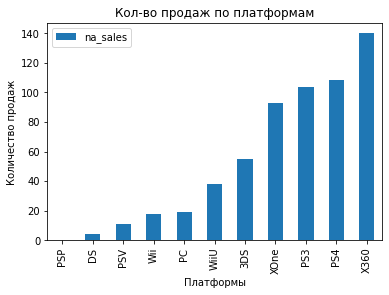

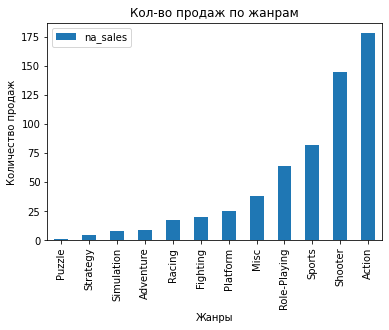

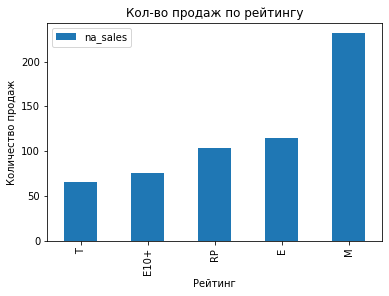

In [17]:
data.pivot_table(index='platform',  values='na_sales', aggfunc='sum').sort_values(by='na_sales').plot(kind='bar')
plt.title('Кол-во продаж по платформам')
plt.ylabel('Количество продаж')
plt.xlabel('Платформы')
#топ5 платформ в Северной Америке: 3DS, PS3,  PS4, X360

data.pivot_table(index='genre',  values='na_sales', aggfunc='sum').sort_values(by='na_sales').plot(kind='bar')
plt.title('Кол-во продаж по жанрам')
plt.ylabel('Количество продаж')
plt.xlabel('Жанры')
#топ5 платформ в Северной Америке: 3DS, PS3,  PS4, X360

data.pivot_table(index='rating',  values='na_sales', aggfunc='sum').sort_values(by='na_sales').plot(kind='bar')
plt.title('Кол-во продаж по рейтингу')
plt.ylabel('Количество продаж')
plt.xlabel('Рейтинг')
#топ 3 рейтинга:  PR, E, M, 

print('Самый популярный возрастной рейтинг "M"')
print('Самый жанр игры "Action"')
print('Самая популярная платформа "X360"')

## Портрет пользователя Европы

Самый популярный возрастной рейтинг "M"
Самый жанр игры "Action"
Самая популярная платформа "PS4"


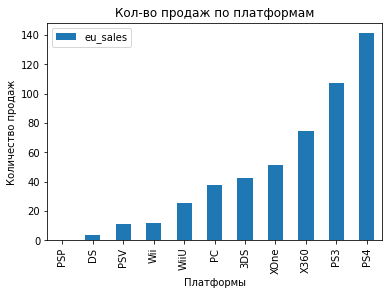

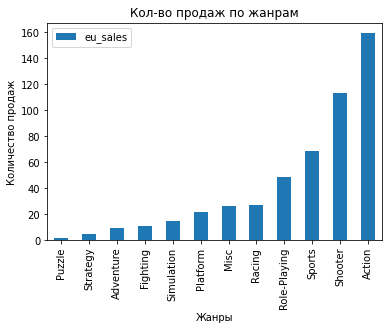

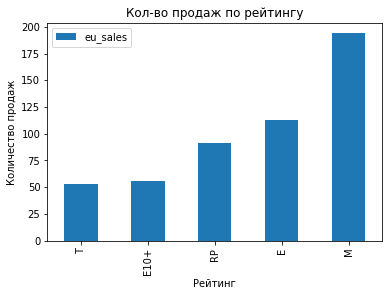

In [18]:
data.pivot_table(index='platform',  values='eu_sales', aggfunc='sum').sort_values(by='eu_sales').plot(kind='bar')
plt.title('Кол-во продаж по платформам')
plt.ylabel('Количество продаж')
plt.xlabel('Платформы')

data.pivot_table(index='genre',  values='eu_sales', aggfunc='sum').sort_values(by='eu_sales').plot(kind='bar')
plt.title('Кол-во продаж по жанрам')
plt.ylabel('Количество продаж')
plt.xlabel('Жанры')

data.pivot_table(index='rating',  values='eu_sales', aggfunc='sum').sort_values(by='eu_sales').plot(kind='bar')
plt.title('Кол-во продаж по рейтингу')
plt.ylabel('Количество продаж')
plt.xlabel('Рейтинг')

print('Самый популярный возрастной рейтинг "M"')
print('Самый жанр игры "Action"')
print('Самая популярная платформа "PS4"')

## Портрет пользователя Японии

Самый популярный возрастной рейтинг "RP"
Самый жанр игры "Role-Playing"
Самая популярная платформа "3DS"


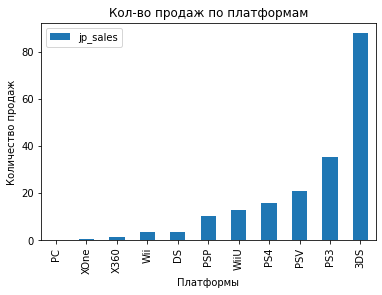

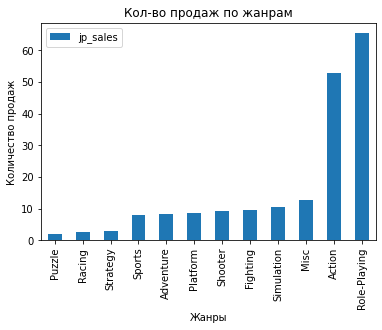

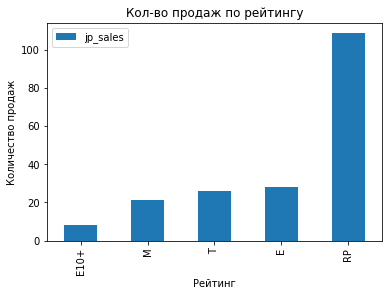

In [19]:
data.pivot_table(index='platform',  values='jp_sales', aggfunc='sum').sort_values(by='jp_sales').plot(kind='bar')
plt.title('Кол-во продаж по платформам')
plt.ylabel('Количество продаж')
plt.xlabel('Платформы')
#топ5 платформ в Японии: WiiU, PS4, PSV, PS3, 3DS,

data.pivot_table(index='genre',  values='jp_sales', aggfunc='sum').sort_values(by='jp_sales').plot(kind='bar')
plt.title('Кол-во продаж по жанрам')
plt.ylabel('Количество продаж')
plt.xlabel('Жанры')
#топ5 жанров в Японии:  Fighting, Simulation, Misc, Action, Role-Playing

data.pivot_table(index='rating',  values='jp_sales', aggfunc='sum').sort_values(by='jp_sales').plot(kind='bar')
plt.title('Кол-во продаж по рейтингу')
plt.ylabel('Количество продаж')
plt.xlabel('Рейтинг')
#топ 3 рейтинга:  T, E, PR

print('Самый популярный возрастной рейтинг "RP"')
print('Самый жанр игры "Role-Playing"')
print('Самая популярная платформа "3DS"')

## Портрет пользователя остальных стран

Самый популярный возрастной рейтинг "M"
Самый жанр игры "Action"
Самая популярная платформа "PS4"


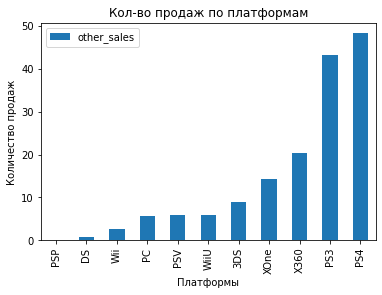

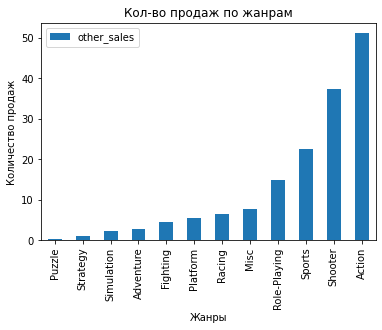

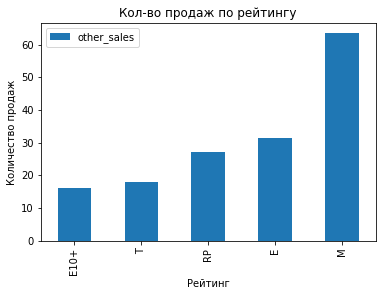

In [20]:
data.pivot_table(index='platform',  values='other_sales', aggfunc='sum').sort_values(by='other_sales').plot(kind='bar') #график
plt.title('Кол-во продаж по платформам')
plt.ylabel('Количество продаж')
plt.xlabel('Платформы')
#топ5 платформ в остальных странах: 3DS, XOne, X360, PS3, PS4

data.pivot_table(index='genre',  values='other_sales', aggfunc='sum').sort_values(by='other_sales').plot(kind='bar') #график
plt.title('Кол-во продаж по жанрам')
plt.ylabel('Количество продаж')
plt.xlabel('Жанры')
#топ5 жанров в остальных странах:  Misc, Role-Playing Sports, Shooter, Action

data.pivot_table(index='rating',  values='other_sales', aggfunc='sum').sort_values(by='other_sales').plot(kind='bar') #график
plt.title('Кол-во продаж по рейтингу')
plt.ylabel('Количество продаж')
plt.xlabel('Рейтинг')
#топ 3 рейтинга: RP, E, M

print('Самый популярный возрастной рейтинг "M"')
print('Самый жанр игры "Action"')
print('Самая популярная платформа "PS4"')

## Сравнение портретов пользователей

Предпочтения по платформам расходятся по всему миру
Однако можно выделить топ 3 лидера PS4, PS3, X360


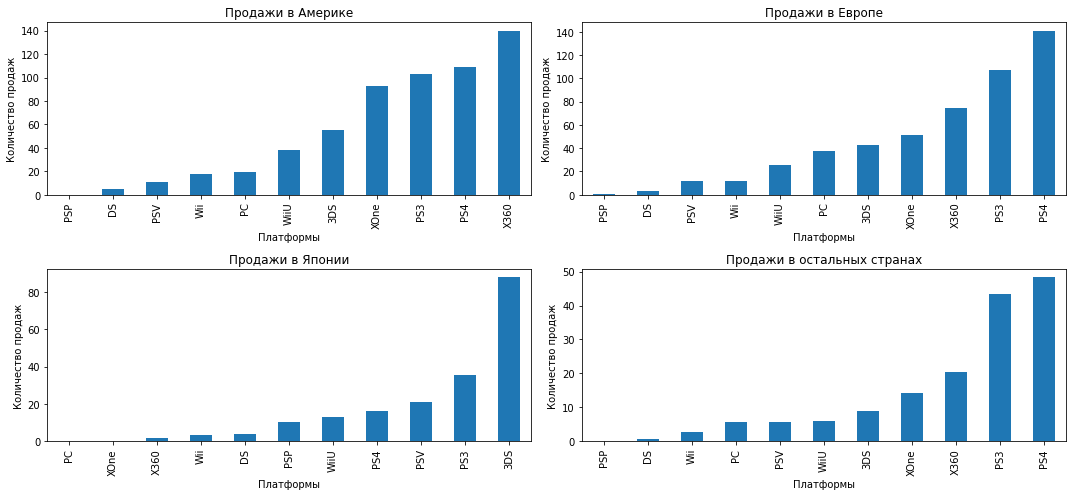

In [21]:
def fig_plot (col):
    return ((data.groupby('platform')[col]
                     .agg('sum')
                     .sort_values()
                     .plot(title=col,kind='bar')
                    ))
 
fig = plt.figure(figsize=(15,7))
 
plt.subplot(2, 2, 1)
fig_plot('na_sales')
plt.title('Продажи в Америке')
plt.ylabel('Количество продаж')
plt.xlabel('Платформы')
 
plt.subplot(2, 2, 2)
fig_plot('eu_sales')
plt.title('Продажи в Европе')
plt.ylabel('Количество продаж')
plt.xlabel('Платформы')

 
plt.subplot(2, 2, 3)
fig_plot('jp_sales')
plt.title('Продажи в Японии')
plt.ylabel('Количество продаж')
plt.xlabel('Платформы')
 
plt.subplot(2, 2, 4)
fig_plot('other_sales')
plt.title('Продажи в остальных странах')
plt.ylabel('Количество продаж')
plt.xlabel('Платформы')
plt.tight_layout()

print('Предпочтения по платформам расходятся по всему миру')
print('Однако можно выделить топ 3 лидера PS4, PS3, X360')

Самый популярный жанр во всем мире "Action"
Данные расходятся по Японии, но в Японии "Action" на втором месте по популярности


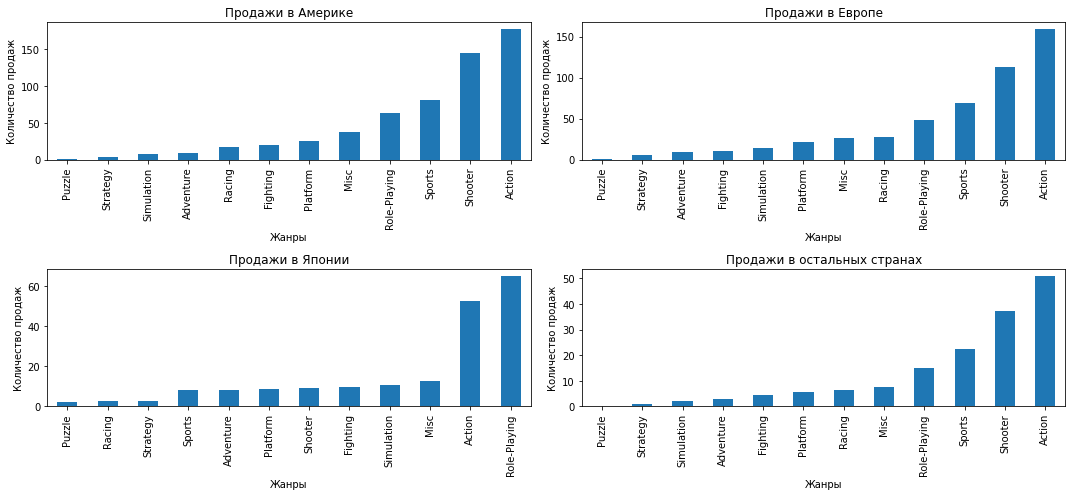

In [22]:
def fig_plot (col):
    return ((data.groupby('genre')[col]
                     .agg('sum')
                     .sort_values()
                     .plot(title=col,kind='bar')
                    ))
 
fig = plt.figure(figsize=(15,7))
 
plt.subplot(2, 2, 1)
fig_plot('na_sales')
plt.title('Продажи в Америке')
plt.ylabel('Количество продаж')
plt.xlabel('Жанры')
 
plt.subplot(2, 2, 2)
fig_plot('eu_sales')
plt.title('Продажи в Европе')
plt.ylabel('Количество продаж')
plt.xlabel('Жанры')
 
plt.subplot(2, 2, 3)
fig_plot('jp_sales')
plt.title('Продажи в Японии')
plt.ylabel('Количество продаж')
plt.xlabel('Жанры')
 
plt.subplot(2, 2, 4)
fig_plot('other_sales')
plt.title('Продажи в остальных странах')
plt.ylabel('Количество продаж')
plt.xlabel('Жанры')
plt.tight_layout()

print('Самый популярный жанр во всем мире "Action"')
print('Данные расходятся по Японии, но в Японии "Action" на втором месте по популярности')

Самый популярный возрастной рейтинг во всем мире "М"
Данные расходятся по Японии. В Японии самый популярный рейтинг "RP"


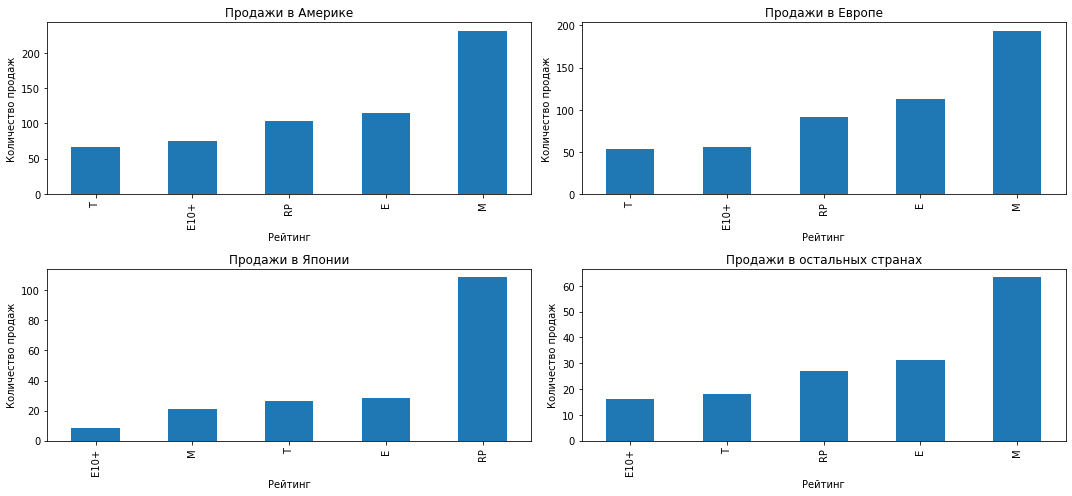

In [23]:
def fig_plot (col):
    return ((data.groupby('rating')[col]
                     .agg('sum')
                     .sort_values()
                     .plot(title=col,kind='bar')
                    ))
 
fig = plt.figure(figsize=(15,7))
 
plt.subplot(2, 2, 1)
fig_plot('na_sales')
plt.title('Продажи в Америке')
plt.ylabel('Количество продаж')
plt.xlabel('Рейтинг')
 
plt.subplot(2, 2, 2)
fig_plot('eu_sales')
plt.title('Продажи в Европе')
plt.ylabel('Количество продаж')
plt.xlabel('Рейтинг')
 
plt.subplot(2, 2, 3)
fig_plot('jp_sales')
plt.title('Продажи в Японии')
plt.ylabel('Количество продаж')
plt.xlabel('Рейтинг')
 
plt.subplot(2, 2, 4)
fig_plot('other_sales')
plt.title('Продажи в остальных странах')
plt.ylabel('Количество продаж')
plt.xlabel('Рейтинг')
plt.tight_layout()

print('Самый популярный возрастной рейтинг во всем мире "М"')
print('Данные расходятся по Японии. В Японии самый популярный рейтинг "RP"')

# Проверка гипотез

## Гипотеза №1

Проверяю гипотезы согласно гипотеза о равенстве средних двух генеральных совокупностей.  Ибо совокупности между собой не связаны.

In [24]:
print('Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые')
print('Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые')
print()
PC=data.query('platform == "PC"')
PC=PC['user_score']
PC=PC.dropna() 

XOne=data.query('platform == "XOne"')
XOne=XOne['user_score']
XOne=XOne.dropna() 

alpha = 0.05
results = st.ttest_ind(XOne, PC)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print()
print('Вывод: Средние пользовательские рейтинги платформ Xbox One и PC близки к одинаковым')
data.query('platform == ["XOne", "PC"]').pivot_table(index='platform',  values='user_score', aggfunc='mean') #проверяю вручную

Нулевую гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу

Вывод: Средние пользовательские рейтинги платформ Xbox One и PC близки к одинаковым


,user_score
platform,
PC,6.428641
XOne,6.521429


## Гипотеза №2

In [25]:
print('Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые')
print('Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports не одинаковые')
print()
data_3=data.query('year_of_release > 2013')

Action=data_3.query('genre == "Action"')
Action=Action['user_score']
Action=Action.dropna() 

Sports=data_3.query('genre == "Sports"')
Sports=Sports['user_score']
Sports=Sports.dropna() 

alpha = 0.05
results = st.ttest_ind(Sports, Action)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print()
print('Вывод: Отвергаем нулевую гипотезу. Полученное значение p-value говорит о том, что хотя данные пришли из разных каналов и неодинаковы, с вероятностью в 28% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними чеками.')
data.query('genre == ["Action", "Sports"]').pivot_table(index='genre',  values='user_score', aggfunc='mean') #проверяю вручную

Нулевую гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые
Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports не одинаковые

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу

Вывод: Отвергаем нулевую гипотезу. Полученное значение p-value говорит о том, что хотя данные пришли из разных каналов и неодинаковы, с вероятностью в 28% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними чеками.


,user_score
genre,
Action,6.825048
Sports,5.455897


# Вывод

In [28]:
def graph1 (df, region, name, axes):
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, labels = sales.platform,
               
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    plt.tight_layout()

In [29]:
def graph2 (df, region, name, axes):
    
    sales = df.pivot_table(index='genre', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'genre': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['genre', 'sales']
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, labels = sales.genre,
               
               legend=False, 
               title = f"Популярность жанров в {name} ", 
               ax = axes).set(ylabel='')
    plt.tight_layout()

In [30]:
def graph3 (df, region, name, axes):
    
    sales = df.pivot_table(index='rating', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    
    sales.columns = ['rating', 'sales']
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, labels = sales.rating,
               
               legend=False, 
               title = f"Популярность рейтингов в {name} ", 
               ax = axes).set(ylabel='')
    plt.tight_layout()

Общий вывод

Самые популярные продаваемые платформы: PS4, Х360. Основноы рынок сбыта - Северная Америка. Однако тенденция роста продаж этих платформ давно стала отрицательной.

Объемы рынков продаж игр сокращаются соответственно: Северная Америка -> Европа -> остальные страны
Предпочтения покупателей по всему миру в целом сохраняется. В конкретном исследовании выбивается Япония. На рынок Японии ориентироваться не стоит, слишком локальный.

Портрет идеальной игры на 2017 год:
Актуальная продаваемая платформа: PS4
Перспективная продаваемая платформа: XOne
Самый стабильно продаваемый жанр: Shooter
Самый продаваемый жанр: Action
Возрастной рейтинг: М


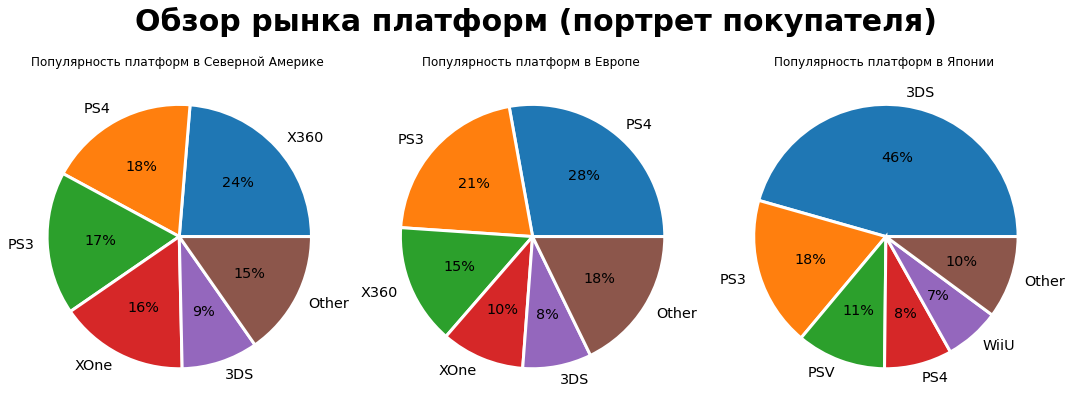

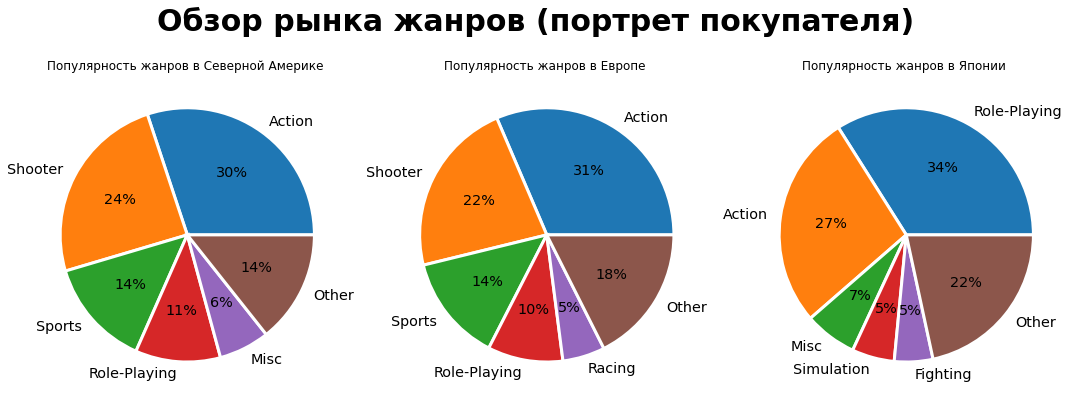

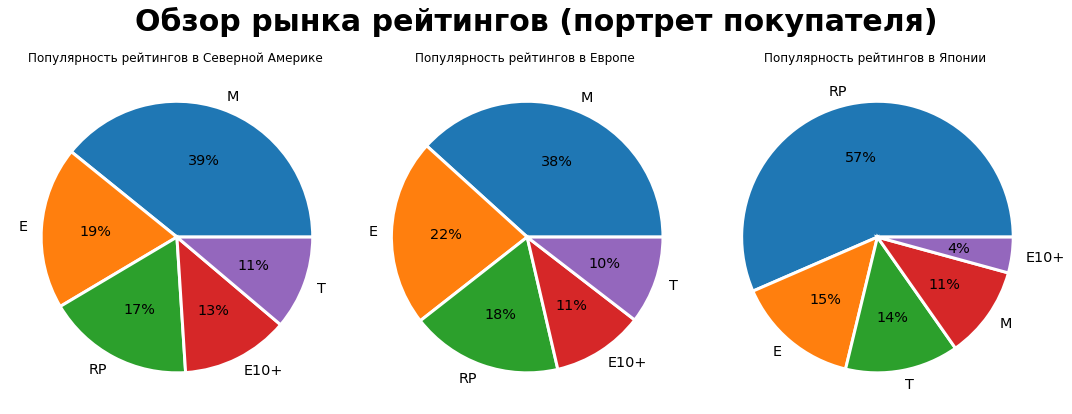

In [31]:
print('Общий вывод')
print()
print('Самые популярные продаваемые платформы: PS4, Х360. Основноы рынок сбыта - Северная Америка. Однако тенденция роста продаж этих платформ давно стала отрицательной.')
print()
print('Объемы рынков продаж игр сокращаются соответственно: Северная Америка -> Европа -> остальные страны')
print('Предпочтения покупателей по всему миру в целом сохраняется. В конкретном исследовании выбивается Япония. На рынок Японии ориентироваться не стоит, слишком локальный.')
print()
print('Портрет идеальной игры на 2017 год:')
print('Актуальная продаваемая платформа: PS4')
print('Перспективная продаваемая платформа: XOne')
print('Самый стабильно продаваемый жанр: Shooter')
print('Самый продаваемый жанр: Action')
print('Возрастной рейтинг: М')


fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize = 30, fontweight='bold')

graph1(data, 'na_sales', 'Северной Америке', axes[0])
graph1(data, 'eu_sales', 'Европе', axes[1])
graph1(data, 'jp_sales', 'Японии', axes[2])


fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка жанров (портрет покупателя)', fontsize = 30, fontweight='bold')

graph2(data, 'na_sales', 'Северной Америке', axes[0])
graph2(data, 'eu_sales', 'Европе', axes[1])
graph2(data, 'jp_sales', 'Японии', axes[2])

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка рейтингов (портрет покупателя)', fontsize = 30, fontweight='bold')

graph3(data, 'na_sales', 'Северной Америке', axes[0])
graph3(data, 'eu_sales', 'Европе', axes[1])
graph3(data, 'jp_sales', 'Японии', axes[2])